In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from mat2json import loadMat


In [2]:
B0005 = loadMat('B0005.mat')

In [3]:
# extracting the discharge 
def extract_discharge(Battery):
    
    cap = []
    i = 1
    for Bat in Battery:
        if Bat['cycle'] == 'discharge':
            cap.append((Bat['data']['Capacity'][0]))
            i+=1
    return cap

[Text(0, 0.5, 'Capacity(Ah)'), Text(0.5, 0, 'Cycles')]

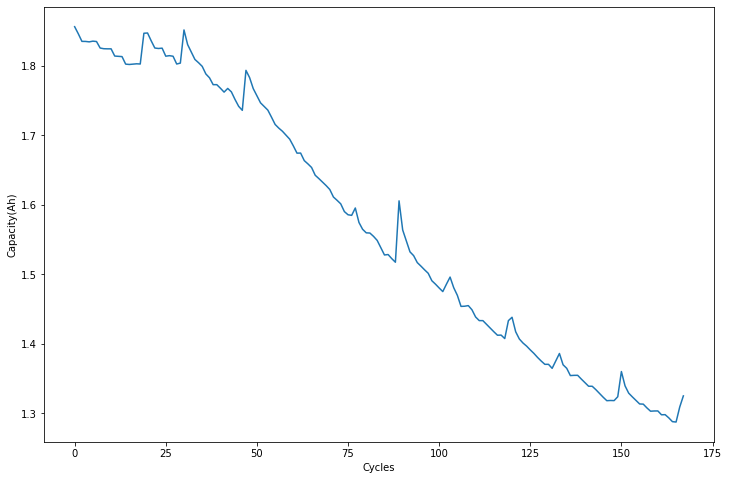

In [4]:
#plotting the capacity as a function of Cycles
cap5 = extract_discharge(B0005)
fig, ax = plt.subplots(1, figsize=(12, 8))
plt.plot(cap5)
ax.set(xlabel='Cycles', ylabel='Capacity(Ah)')

In [6]:
A = extract_charge_VIT(B0005)
InitC = 1.85;
cap5 = extract_discharge(B0005);

In [7]:
xData_raw = A
comp = len(A) - len(cap5); 
yData_raw = np.vstack((InitC*np.ones((comp, 1)), np.reshape(cap5, (len(cap5), 1))))

In [8]:
# feature scaling and Normalization
xminmax = MinMaxScaler(feature_range=(0, 1)) # xData_raw feature scaling 
xData = xminmax.fit_transform(xData_raw) # feature scaling of xData_raw
#print(xData)
yminmax = MinMaxScaler(feature_range=(0, 1)) # yData_raw feature scaling 
yData = yminmax.fit_transform(yData_raw) # feature scaling of yData_raw
#print(yData)

In [38]:
# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(xData, yData, test_size = 0.20,shuffle = False)# split the data into train and test


In [29]:
#create an MLP Regressor
nn = MLPRegressor(hidden_layer_sizes=(1000), shuffle = False, max_iter=1000)

In [30]:
# Training the Network
nn.fit(X_train, y_train) # fit the data

C:\Users\srini\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=1000, learning_rate='constant',
             learning_rate_init=0.001, max_iter=1000, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=False, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [31]:
#Predicting network output
y_predict = nn.predict(X_test) # predictions on test data
print(y_predict.shape)


(57,)


In [32]:
# calculate the prediction error
mape = np.sum(abs(y_test[:,0]- y_predict))/np.size(y_test)
print(mape)

0.029548057965223584


In [33]:
# Actual predicted values
y_predict_actual = yminmax.inverse_transform(y_predict.reshape(-1,1)) # get the original a
#print(y_predict_actual)

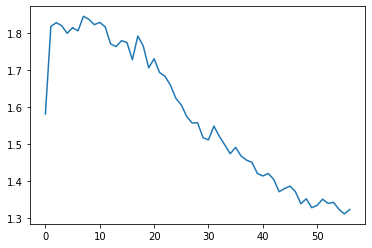

In [34]:
#plot the actual y_predict 
plt.plot(y_predict_actual)

In [35]:
# Actual y
y_test_actual = yminmax.inverse_transform(y_test[:,0].reshape(-1,1)) # get the original a
#print(y_test_actual)

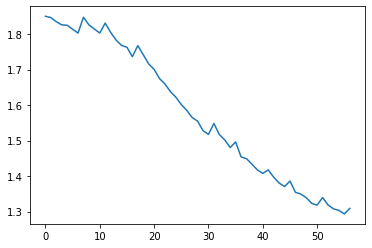

In [36]:
#plot the actual y_test
plt.plot(y_test_actual)

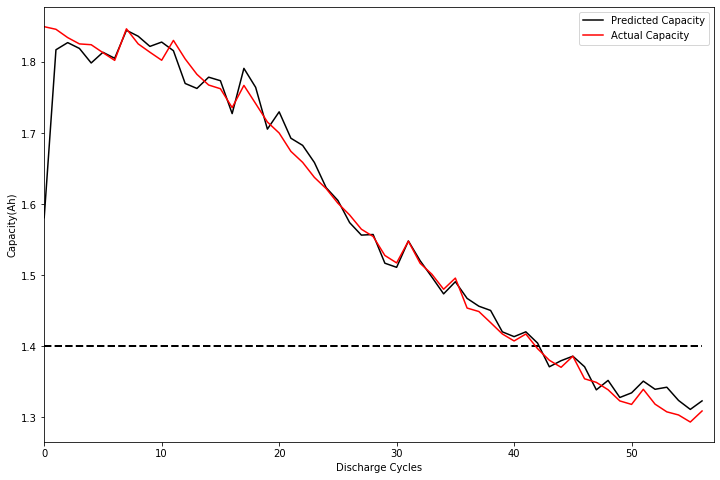

In [37]:
# Plotting the predicted capacity and actual capacity
fig, ax = plt.subplots(1, figsize=(12, 8))
ax.plot(np.arange(57), 1.4*np.ones((57, 1)),'k--',linewidth = 2)
ax.plot(y_predict_actual, color='black',label='Predicted Capacity')
ax.plot(y_test_actual, color='red',label='Actual Capacity')
ax.set(xlabel='Discharge Cycles', ylabel='Capacity(Ah)')
ax.set_xlim([0,57])
#ax.set_ylim([0,2])
ax.legend()